In [1]:
from keras.datasets import imdb
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import pad_sequences
import keras

2025-12-24 12:17:47.562870: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-24 12:17:47.753652: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1766546267.828974   48574 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1766546267.853529   48574 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-12-24 12:17:48.025706: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
# 200단어 샘플 데이터 셋
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=200)
print(train_input.shape, test_input.shape)

# 1, 2번 단어 토큰 수 확인
print(len(train_input[0]))
print(len(train_input[1]))

# 1번 리뷰 내용 토큰으로 확인
print(train_input[0])

# 타겟 데이터 20개 * 1: 긍정, 0: 부정
print(train_target[:20])

(25000,) (25000,)
218
189
[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 4, 173, 36, 2, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 2, 2, 5, 150, 4, 172, 112, 167, 2, 2, 2, 39, 4, 172, 2, 2, 17, 2, 38, 13, 2, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 2, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 2, 12, 8, 2, 8, 106, 5, 4, 2, 2, 16, 2, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 2, 28, 77, 52, 5, 14, 2, 16, 82, 2, 8, 4, 107, 117, 2, 15, 2, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 7, 4, 2, 2, 13, 104, 88, 4, 2, 15, 2, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 2, 22, 21, 134, 2, 26, 2, 5, 144, 30, 2, 18, 51, 36, 28, 2, 92, 25, 104, 4, 2, 65, 16, 38, 2, 88, 12, 16, 2, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [3]:
# 훈련 >> 훈련 & 검증(20%)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

# 길이 측정
lengths = np.array([len(x) for x in train_input])

# 평균 & 중앙값
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


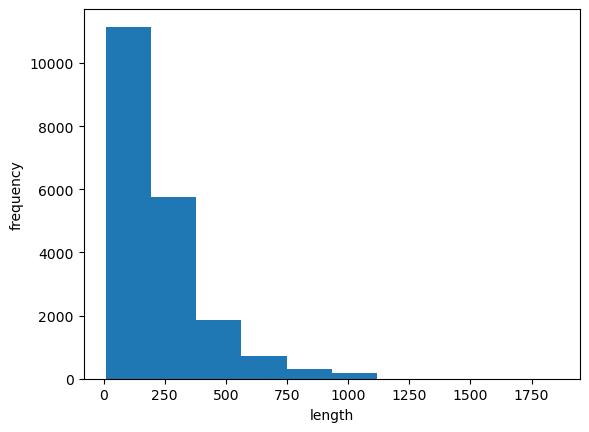

In [4]:
# 길이 그래프 확인
plt.hist(lengths)
plt.xlabel('length') 
plt.ylabel('frequency') 
plt.show()

In [5]:
# 입력 길이 100 고정
train_seq = pad_sequences(train_input, maxlen=100)
print(train_seq.shape)

(20000, 100)


In [6]:
# 100 고정 1번 샘플 확인 
print(train_seq[0])

[ 10   4  20   9   2   2   2   5  45   6   2   2  33   2   8   2 142   2
   5   2  17  73  17   2   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12   2  69   2 142  73   2   6
   2   7   2   2 188   2 103  14  31  10  10   2   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10   2 158]


In [7]:
# 샘플 잘린 부분 확인
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 2, 158]


In [8]:
# 6번 샘플 확인
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2   2   2 183  10
  10  13  82  79   4   2  36  71   2   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14   2  56 129   2  10  10  21   2  94   2   2   2   2  11 190
  24   2   2   7  94   2   2  10  10  87   2  34  49   2   7   2   2   2
   2   2   2   2  46  48  64  18   4   2]


In [9]:
# 검증 세트 100길이 고정
val_seq = pad_sequences(val_input, maxlen=100)

In [10]:
# simpleRNN 시그모이드 모델
model = keras.Sequential()
model.add(keras.layers.Input(shape=(100,200)))
model.add(keras.layers.SimpleRNN(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

W0000 00:00:1766546276.583608   48574 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [11]:
# 배열 맞춤
train_oh = keras.utils.to_categorical(train_seq)
print(train_oh.shape)

# 1번 샘플 1번 토큰 10 확인
print(train_oh[0][0][:12])

# 1번 샘플 총합 확인
print(np.sum(train_oh[0][0]))

# 검증세트 배열 맞춤
val_oh = keras.utils.to_categorical(val_seq)

(20000, 100, 200)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
1.0


In [12]:
# 모델 구조 확인
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 8)              │         1,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,681 (6.57 KB)

 Trainable params: 1,681 (6.57 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# 아담 옵티마이저, 이진분류, accuracy 모델
model.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_oh, train_target, epochs=100, batch_size=64, 
                    validation_data=(val_oh, val_target), 
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.5103 - loss: 0.6964 - val_accuracy: 0.6158 - val_loss: 0.6712
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.5840 - loss: 0.6762 - val_accuracy: 0.5988 - val_loss: 0.6650
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.5723 - loss: 0.6807 - val_accuracy: 0.6110 - val_loss: 0.6663
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.6592 - loss: 0.6300 - val_accuracy: 0.6902 - val_loss: 0.5941
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.6898 - loss: 0.5944 - val_accuracy: 0.7070 - val_loss: 0.5739
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7071 - loss: 0.5778 - val_accuracy: 0.7140 - val_loss: 0.5678
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7316 - loss: 0.5533 - val_accuracy: 0.7062 - val_loss: 0.5693
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.7175 - loss: 0.5644 - 

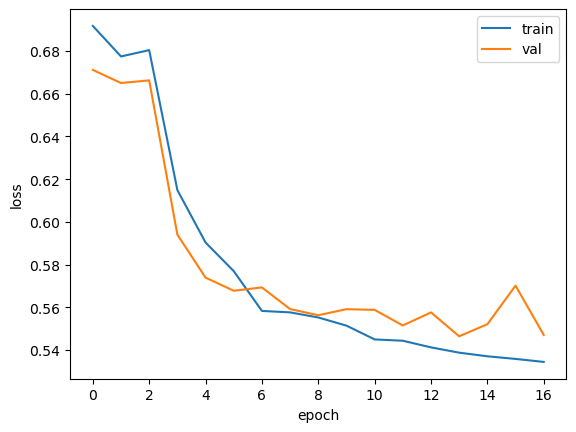

In [14]:
# 훈련 & 검증 손실 그래프
plt.plot(history.history['loss'], label='train') 
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch') 
plt.ylabel('loss') 
plt.legend()
plt.show()

In [15]:
# 입력 데이터 크기 확인
print(train_seq.nbytes, train_oh.nbytes)

8000000 3200000000


In [16]:
# 데이터 셋
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42) 
train_seq = pad_sequences(train_input, maxlen=100) 
val_seq = pad_sequences(val_input, maxlen=100)

# word embedding을 활용
model_emb = keras.Sequential()
model_emb.add(keras.layers.Input(shape=(100,)))
model_emb.add(keras.layers.Embedding(500, 16))
model_emb.add(keras.layers.SimpleRNN(8))
model_emb.add(keras.layers.Dense(1, activation='sigmoid'))

model_emb.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 16)        │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 8)              │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,209 (32.07 KB)

 Trainable params: 8,209 (32.07 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# 아담 옵티마이저, 이진분류, accuracy 모델
model_emb.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model_emb.fit(train_seq, train_target, epochs=100, batch_size=64, 
                        validation_data=(val_seq, val_target),
                        callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.5266 - loss: 0.6906 - val_accuracy: 0.6860 - val_loss: 0.5908
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.7029 - loss: 0.5794 - val_accuracy: 0.7420 - val_loss: 0.5366
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.7471 - loss: 0.5247 - val_accuracy: 0.5536 - val_loss: 0.8035
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.6930 - loss: 0.5882 - val_accuracy: 0.6966 - val_loss: 0.5809
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7529 - loss: 0.5163 - val_accuracy: 0.7556 - val_loss: 0.5137
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7872 - loss: 0.4701 - val_accuracy: 0.7690 - val_loss: 0.4959
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.8073 - loss: 0.4390 - val_accuracy: 0.7728 - val_loss: 0.4928
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.8079 - loss: 0.4240 

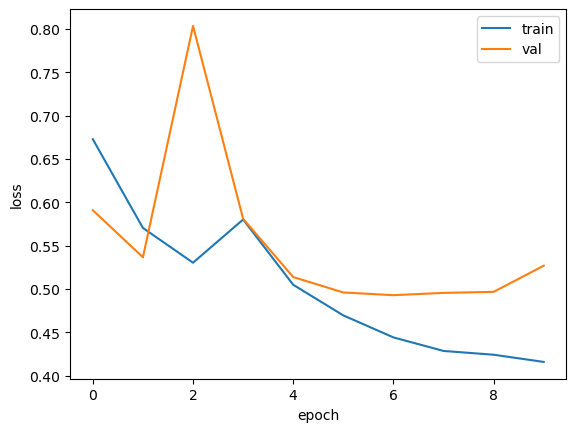

In [18]:
# 훈련 & 검증 손실 그래프 확인
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val') 
plt.xlabel('epoch') 
plt.ylabel('loss') 
plt.legend() 
plt.show()

파이토치

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from keras.datasets import imdb
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
from torch.utils.data import TensorDataset, DataLoader

In [20]:
# 실행마다 동일한 결과를 얻기 위해 파이토치에 랜덤 시드를 지정하고 GPU 연산을 결정적으로 만듬
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)
    torch.backends.cudnn.deterministic = True

In [21]:
# 데이터 셋
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

# 길이 100 고정
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

print(train_seq.shape, train_target.shape)

(20000, 100) (20000,)


In [22]:
# 데이터 타입 변환 전
print(train_target.dtype)

# 타입 변환
train_seq = torch.tensor(train_seq)
val_seq = torch.tensor(val_seq)

train_target = torch.tensor(train_target, dtype=torch.float32)
val_target = torch.tensor(val_target, dtype=torch.float32)

# 데이터 타입 변환 후
print(train_target.dtype)

int64
torch.float32


In [ ]:
# 변환한 데이터로 데이터 셋 구성
train_dataset = TensorDataset(train_seq, train_target)
val_dataset = TensorDataset(val_seq, val_target)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

In [ ]:
# 모듈 상속으로 모델 구성
# 입력층: 배치 500, 벡터 16
# RNN층: 입력 16, 출력 8
# Linear층: 입력 8, 출력 1
# 시그모이드층
class IMDBRnn(nn.Module):
    def __init__(self):
        super().__init__()
        self.embedding = nn.Embedding(500, 16)
        self.rnn = nn.RNN(16, 8, batch_first=True)
        self.dense = nn.Linear(8, 1)
        self.sigmoid = nn.Sigmoid()
    
    # 각 층을 호출
    def forward(self, x):
        x = self.embedding(x)
        _, hidden = self.rnn(x)
        outputs = self.dense(hidden[-1])
        return self.sigmoid(outputs)

model = IMDBRnn()

In [ ]:
# CPU/GPU 선정 > 모델 보내기
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

In [ ]:
# 최종 출력(시그모이드 함수에 의한 BCELoss)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=2e-4)

In [ ]:
# 각 저장할 매개변수
train_hist = []
val_hist = []
patience = 2
best_loss = -1
early_stopping_counter = 0

# 모델 학습과정
epochs = 100
for epoch in range(epochs):
    model.train()
    train_loss = 0
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    model.eval()
    val_loss = 0
    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), targets)
            val_loss += loss.item()

    train_loss = train_loss/len(train_loader)
    val_loss = val_loss/len(val_loader)
    train_hist.append(train_loss)
    val_hist.append(val_loss)
    print(f"에포크:{epoch+1},",
          f"훈련 손실:{train_loss:.4f}, 검증 손실:{val_loss:.4f}")

    if best_loss == -1 or val_loss < best_loss:
        best_loss = val_loss
        early_stopping_counter = 0
        torch.save(model.state_dict(), 'best_rnn_model.pt')
    else:
        early_stopping_counter += 1
        if early_stopping_counter >= patience:
            print(f"{epoch+1}번째 에포크에서 조기 종료되었습니다.")
            break

에포크:1, 훈련 손실:0.7088, 검증 손실:0.7030
에포크:2, 훈련 손실:0.6992, 검증 손실:0.6970
에포크:3, 훈련 손실:0.6941, 검증 손실:0.6934
에포크:4, 훈련 손실:0.6907, 검증 손실:0.6909
에포크:5, 훈련 손실:0.6883, 검증 손실:0.6893
에포크:6, 훈련 손실:0.6865, 검증 손실:0.6875
에포크:7, 훈련 손실:0.6847, 검증 손실:0.6861
에포크:8, 훈련 손실:0.6829, 검증 손실:0.6850
에포크:9, 훈련 손실:0.6812, 검증 손실:0.6834
에포크:10, 훈련 손실:0.6793, 검증 손실:0.6820
에포크:11, 훈련 손실:0.6772, 검증 손실:0.6806
에포크:12, 훈련 손실:0.6750, 검증 손실:0.6789
에포크:13, 훈련 손실:0.6725, 검증 손실:0.6766
에포크:14, 훈련 손실:0.6698, 검증 손실:0.6745
에포크:15, 훈련 손실:0.6667, 검증 손실:0.6712
에포크:16, 훈련 손실:0.6628, 검증 손실:0.6675
에포크:17, 훈련 손실:0.6579, 검증 손실:0.6634
에포크:18, 훈련 손실:0.6517, 검증 손실:0.6578
에포크:19, 훈련 손실:0.6442, 검증 손실:0.6514
에포크:20, 훈련 손실:0.6371, 검증 손실:0.6452
에포크:21, 훈련 손실:0.6303, 검증 손실:0.6400
에포크:22, 훈련 손실:0.6239, 검증 손실:0.6348
에포크:23, 훈련 손실:0.6183, 검증 손실:0.6302
에포크:24, 훈련 손실:0.6117, 검증 손실:0.6241
에포크:25, 훈련 손실:0.6054, 검증 손실:0.6177
에포크:26, 훈련 손실:0.6006, 검증 손실:0.6147
에포크:27, 훈련 손실:0.5960, 검증 손실:0.6113
에포크:28, 훈련 손실:0.5910, 검증 손실:0.6073
에포크:29, 훈련 손실:0.5863, 검증 손실:0

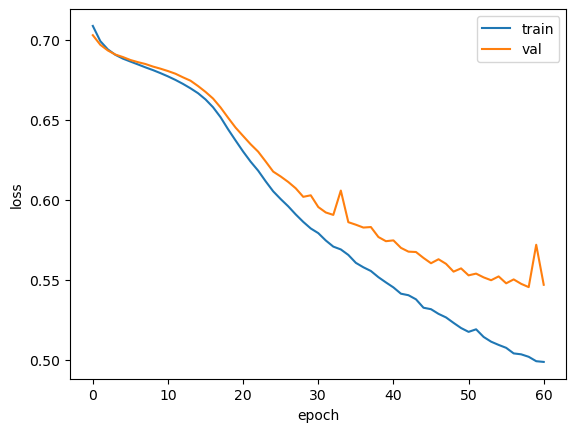

In [ ]:
# 손실 그래프
plt.plot(train_hist, label='train')
plt.plot(val_hist, label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
# 최적 에포크 모델 호출
model.load_state_dict(torch.load('best_rnn_model.pt', weights_only=True))

# 정답 확인
model.eval()
corrects = 0
with torch.no_grad():
    for inputs, targets in val_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        predicts = outputs > 0.5
        corrects += (predicts.squeeze() == targets).sum().item()

# 정확도
accuracy = corrects / len(val_dataset)
print(f"검증 정확도: {accuracy:.4f}")

검증 정확도: 0.7388
